In [2]:
#Importing All the Required Directory
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import metrics
from sklearn import preprocessing
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns

In [3]:
# Loading Dataset
df = pd.read_csv('data 1.csv.')
df


addr_state  annual_inc earliest_cr_line emp_length  \
0             MO     50000.0           May-12     1 year   
1             HI     92000.0           Dec-01  10+ years   
2             TX     89000.0           Mar-89  10+ years   
3             CA     33000.0           Nov-04    9 years   
4             MI     35580.0           Feb-97        NaN   
...          ...         ...              ...        ...   
19995         MO     38500.0           Sep-10    4 years   
19996         VA     80000.0           Dec-98    3 years   
19997         TX     95000.0           May-96  10+ years   
19998         FL     35000.0           Mar-03  10+ years   
19999         FL     30700.0           Apr-94   < 1 year   

                               emp_title  fico_range_high  fico_range_low  \
0                       Tower technician              719             715   
1                             Supervisor              684             680   
2                APPLICATIONS PROGRAMMER              679             675   
3      San Diego Unified School District              674             670   
4                                    NaN              704             700   
...                                  ...              ...             ...   
19995               lighting coordinator              679             675   
19996      Contract & Compliance Manager              674             670   
19997                         Pharmacist              729             725   
19998                Manager In Training              809             805   
19999                      rv technician              664             660   

      grade home_ownership application_type  ... pub_rec  \
0         C            OWN       Individual  ...       0   
1         B           RENT       Individual  ...       0   
2         B       MORTGAGE       Individual  ...       0   
3         C           RENT       Individual  ...       1   
4         B       MORTGAGE       Individual  ...       0   
...     ...            ...              ...  ...     ...   
19995     D           RENT       Individual  ...       0   
19996     D       MORTGAGE       Individual  ...       0   
19997     B       MORTGAGE       Individual  ...       0   
19998     A       MORTGAGE       Individual  ...       0   
19999     E       MORTGAGE       Individual  ...       0   

       pub_rec_bankruptcies             purpose  revol_bal  revol_util  \
0                       0.0  debt_consolidation       2568         9.8   
1                       0.0  debt_consolidation      30394        75.4   
2                       0.0         credit_card      38400        75.3   
3                       1.0  debt_consolidation      21224        69.4   
4                       0.0  debt_consolidation       3471        39.4   
...                     ...                 ...        ...         ...   
19995                   0.0  debt_consolidation       5816        60.0   
19996                   0.0  debt_consolidation      13886        75.1   
19997                   0.0  debt_consolidation      43166        60.7   
19998                   0.0                 car       1110         4.4   
19999                   0.0  debt_consolidation       8910        78.8   

       sub_grade        term                    title  total_acc  \
0             C4   36 months       Debt consolidation         11   
1             B2   36 months       Debt consolidation         35   
2             B2   60 months  Credit card refinancing         41   
3             C1   36 months           Breathing Room         16   
4             B5   36 months       debitconsolidation         19   
...          ...         ...                      ...        ...   
19995         D4   36 months       Debt consolidation         10   
19996         D4   60 months       Debt consolidation         30   
19997         B5   36 months       Debt consolidation         29   
19998         A5   36 months            Car financing         19   
19

In [4]:
label_encoder = preprocessing.LabelEncoder() 
df['emp_length'] = label_encoder.fit_transform(df['annual_inc'])
df.head()

addr_state  annual_inc earliest_cr_line  emp_length  \
0         MO     50000.0           May-12         929   
1         HI     92000.0           Dec-01        1959   
2         TX     89000.0           Mar-89        1912   
3         CA     33000.0           Nov-04         407   
4         MI     35580.0           Feb-97         487   

                           emp_title  fico_range_high  fico_range_low grade  \
0                   Tower technician              719             715     C   
1                         Supervisor              684             680     B   
2            APPLICATIONS PROGRAMMER              679             675     B   
3  San Diego Unified School District              674             670     C   
4                                NaN              704             700     B   

  home_ownership application_type  ... pub_rec  pub_rec_bankruptcies  \
0            OWN       Individual  ...       0                   0.0   
1           RENT       Individual  ...       0                   0.0   
2       MORTGAGE       Individual  ...       0                   0.0   
3           RENT       Individual  ...       1                   1.0   
4       MORTGAGE       Individual  ...       0                   0.0   

              purpose  revol_bal  revol_util  sub_grade        term  \
0  debt_consolidation       2568         9.8         C4   36 months   
1  debt_consolidation      30394        75.4         B2   36 months   
2         credit_card      38400        75.3         B2   60 months   
3  debt_consolidation      21224        69.4         C1   36 months   
4  debt_consolidation       3471        39.4         B5   36 months   

                     title  total_acc verification_status  
0       Debt consolidation         11     Source Verified  
1       Debt consolidation         35     Source Verified  
2  Credit card refinancing         41        Not Verified  
3           Breathing Room         16        Not Verified  
4       debitconsolidation         19            Verified  

[5 rows x 27 columns]

In [5]:
#Statement For Checking Shape Of Dataset
df.shape

(20000, 27)

In [6]:
#Statement For Dataset Information
df.info

<bound method DataFrame.info of       addr_state  annual_inc earliest_cr_line  emp_length  \
0             MO     50000.0           May-12         929   
1             HI     92000.0           Dec-01        1959   
2             TX     89000.0           Mar-89        1912   
3             CA     33000.0           Nov-04         407   
4             MI     35580.0           Feb-97         487   
...          ...         ...              ...         ...   
19995         MO     38500.0           Sep-10         582   
19996         VA     80000.0           Dec-98        1747   
19997         TX     95000.0           May-96        2000   
19998         FL     35000.0           Mar-03         466   
19999         FL     30700.0           Apr-94         340   

                               emp_title  fico_range_high  fico_range_low  \
0                       Tower technician              719             715   
1                             Supervisor              684             680   
2   

<Axes: xlabel='annual_inc', ylabel='Count'>

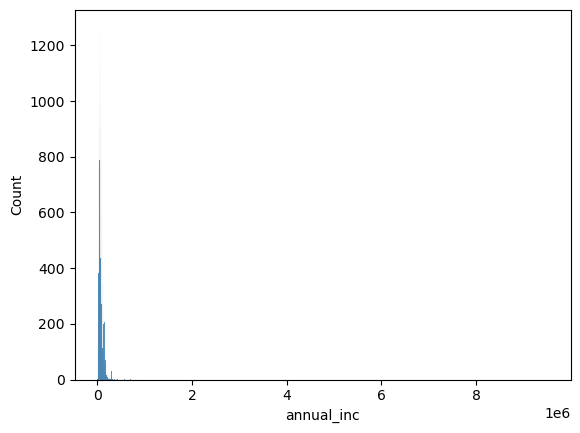

In [10]:
sns.histplot(df['annual_inc'])

In [7]:
#Statement For Checking Annual Imcome
df['annual_inc'].value_counts()

annual_inc
60000.0     730
50000.0     632
65000.0     602
80000.0     552
70000.0     532
           ... 
110250.0      1
27040.0       1
121364.0      1
53851.2       1
30700.0       1
Name: count, Length: 2591, dtype: int64

In [8]:
#Statement for checking Verification Status
df['verification_status'].value_counts(normalize =True)


verification_status
Source Verified    0.3861
Verified           0.3083
Not Verified       0.3056
Name: proportion, dtype: float64

In [9]:
df.describe()

annual_inc    emp_length  fico_range_high  fico_range_low  \
count  2.000000e+04  20000.000000     20000.000000    20000.000000   
mean   7.649765e+04   1368.525800       700.204400      696.204250   
std    8.568097e+04    675.322292        31.768558       31.767853   
min    0.000000e+00      0.000000       664.000000      660.000000   
25%    4.500000e+04    776.000000       674.000000      670.000000   
50%    6.500000e+04   1391.000000       694.000000      690.000000   
75%    9.000000e+04   1928.000000       714.000000      710.000000   
max    9.522972e+06   2590.000000       850.000000      845.000000   

           int_rate    loan_amnt  num_actv_bc_tl      mort_acc   tot_cur_bal  \
count  20000.000000  20000.00000    18989.000000  19296.000000  1.898900e+04   
mean      13.259451  14426.67125        3.617410      1.669310  1.412009e+05   
std        4.772028   8811.38736        2.220795      1.981554  1.558483e+05   
min        5.310000   1000.00000        0.000000      0.000000  0.000000e+00   
25%        9.750000   7800.00000        2.000000      0.000000  2.959600e+04   
50%       12.790000  12000.00000        3.000000      1.000000  8.070700e+04   
75%       16.020000  20000.00000        5.000000      3.000000  2.102150e+05   
max       30.990000  40000.00000       20.000000     19.000000  2.210119e+06   

           open_acc       pub_rec  pub_rec_bankruptcies     revol_bal  \
count  20000.000000  20000.000000          19989.000000   20000.00000   
mean      11.593450      0.208000              0.130722   16181.77750   
std        5.507847      0.568816              0.374106   21917.28208   
min        1.000000      0.000000              0.000000       0.00000   
25%        8.000000      0.000000              0.000000    5803.75000   
50%       11.000000      0.000000              0.000000   11051.50000   
75%       14.000000      0.000000              0.000000   19876.25000   
max       56.000000     15.000000              8.000000  921464.00000   

         revol_util     total_acc  
count  19987.000000  20000.000000  
mean      51.709746     25.022300  
std       24.509718     12.098794  
min        0.000000      2.000000  
25%       33.200000     16.000000  
50%       52.200000     23.000000  
75%       70.600000     32.000000  
max      127.600000    107.000000

In [11]:
df.groupby('annual_inc')['total_acc'].describe()

count       mean       std   min   25%   50%   75%   max
annual_inc                                                          
0.0           9.0  20.222222  8.333333   9.0  14.0  18.0  27.0  34.0
1200.0        1.0  14.000000       NaN  14.0  14.0  14.0  14.0  14.0
5000.0        2.0  16.000000  7.071068  11.0  13.5  16.0  18.5  21.0
6000.0        1.0  15.000000       NaN  15.0  15.0  15.0  15.0  15.0
7200.0        1.0   7.000000       NaN   7.0   7.0   7.0   7.0   7.0
...           ...        ...       ...   ...   ...   ...   ...   ...
960000.0      1.0  32.000000       NaN  32.0  32.0  32.0  32.0  32.0
1100000.0     1.0  34.000000       NaN  34.0  34.0  34.0  34.0  34.0
1176000.0     1.0  25.000000       NaN  25.0  25.0  25.0  25.0  25.0
1200000.0     3.0  20.666667  1.527525  19.0  20.0  21.0  21.5  22.0
9522972.0     1.0  20.000000       NaN  20.0  20.0  20.0  20.0  20.0

[2591 rows x 8 columns]

<Axes: xlabel='home_ownership', ylabel='Count'>

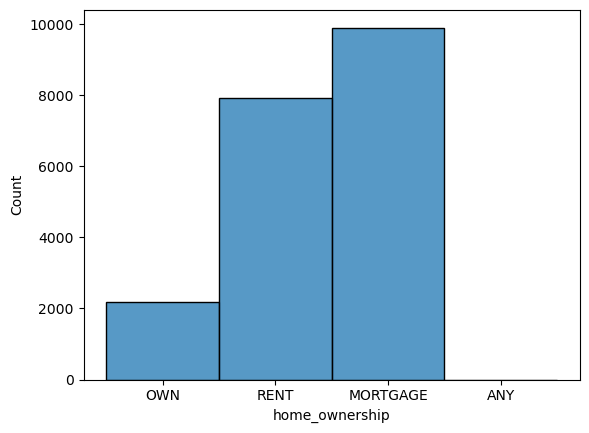

In [12]:
sns.histplot(df['home_ownership'])

In [13]:
df.groupby('addr_state')['emp_title'].describe()

count unique                      top freq
addr_state                                           
AK            48     48          General foreman    1
AL           219    199                  Teacher   10
AR           138    128         Registered Nurse    3
AZ           473    416                  Manager    7
CA          2702   2083                  Teacher   50
CO           395    356                  Manager    8
CT           273    249                 Director    5
DC            51     49       Management Analyst    2
DE            59     57                  teacher    2
FL          1241    971                  Teacher   22
GA           598    503                  Teacher   24
HI            96     89         Registered Nurse    3
ID            19     19       Accounting Manager    1
IL           755    647                  Manager   11
IN           285    256                  Teacher    5
KS           173    160                  Teacher    5
KY           187    174                  Teacher    7
LA           238    208                  Teacher    9
MA           412    354                  Manager    6
MD           441    394                  Teacher    8
ME            34     33                  manager    2
MI           449    384         Registered Nurse    7
MN           335    296                    Sales    6
MO           276    261                  Teacher    4
MS            78     75                  Manager    3
MT            48     47                  Manager    2
NC           548    487                  Teacher   10
ND            22     22       Pumping Specialist    1
NE            55     54                  Teacher    2
NH            73     73       Area Sales Manager    1
NJ           683    584                  Teacher   11
NM            85     83                       RN    2
NV           252    236               Supervisor    3
NY          1520   1214                  Teacher   29
OH           639    554                  Teacher    9
OK           179    167                  Manager    4
OR           229    213                  Teacher    4
PA           627    543                  Teacher   11
RI            79     79  Lead Actuarial Analyst     1
SC           237    218                  Teacher    9
SD            34     32                  Teacher    3
TN           262    237                  Teacher    5
TX          1624   1257                  Teacher   46
UT           137    127                  Teacher    5
VA           538    462                  Teacher    8
VT            27     26                    Owner    2
WA           422    378                  Manager    6
WI           230    206                  Manager    5
WV            68     66                  Teacher    3
WY            29     28                  Teacher    2

C:\Users\Shaikh Fayaz\.conda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


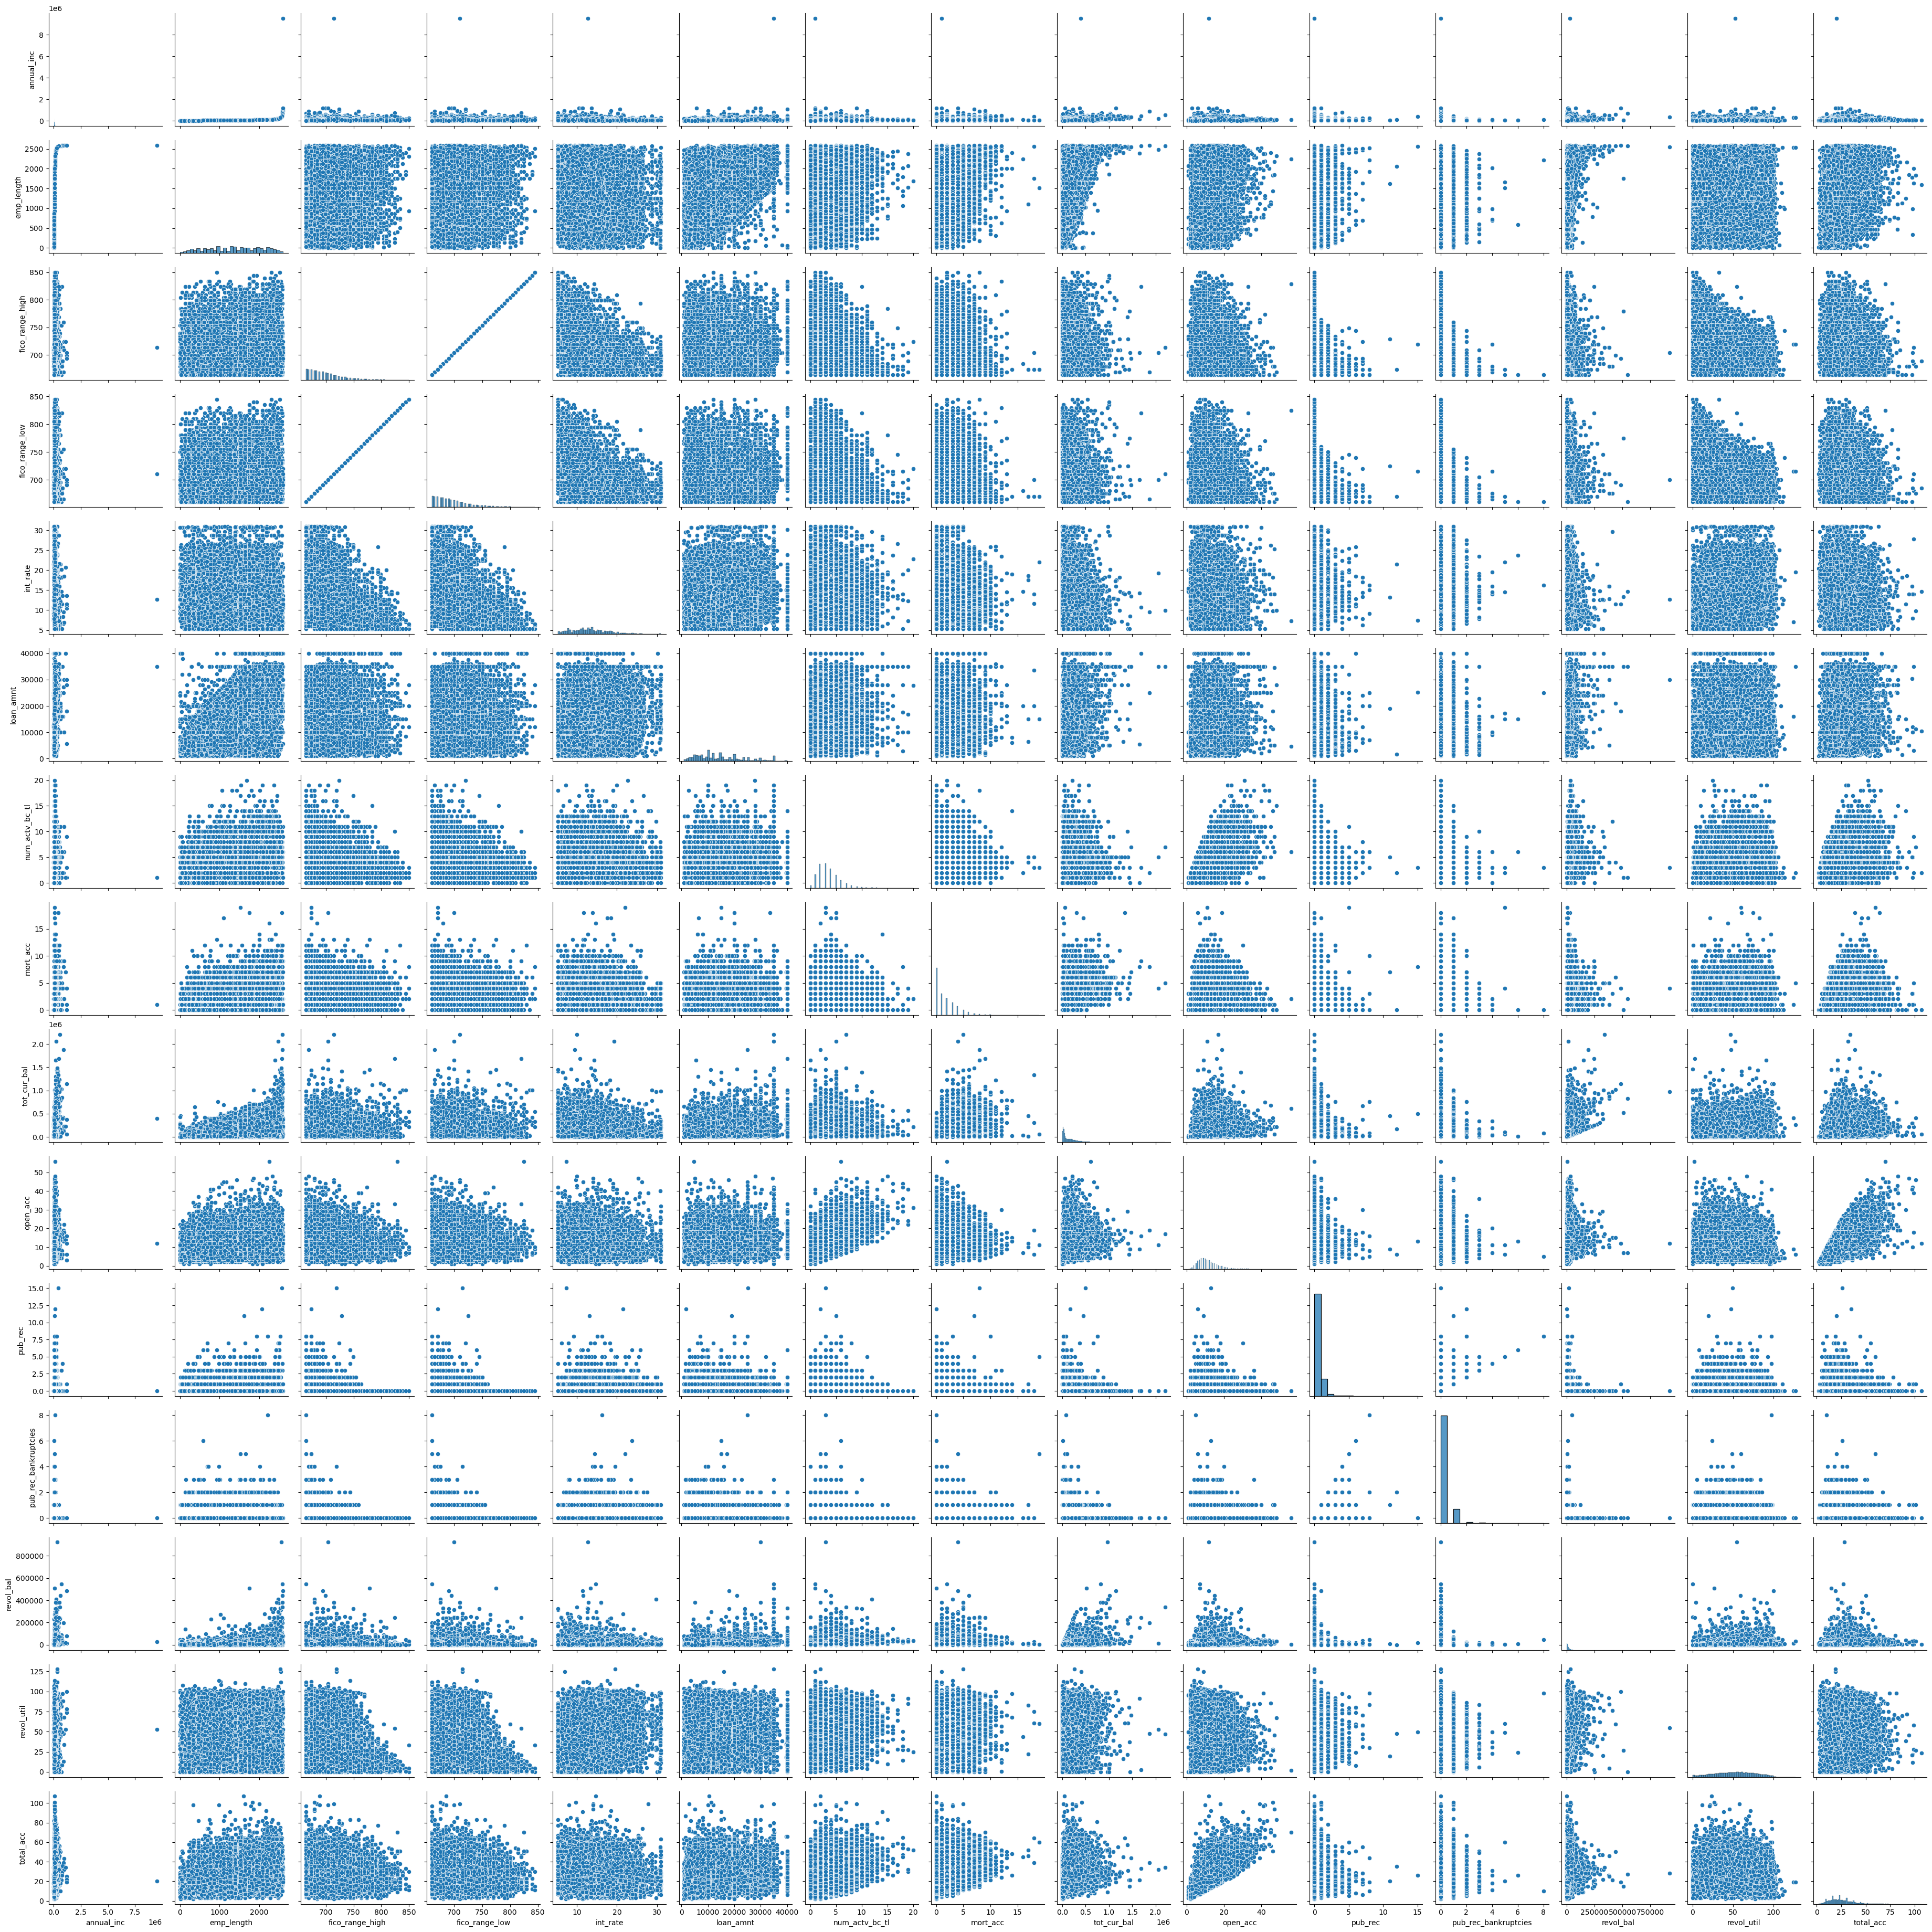

In [14]:
sns.pairplot(data = df)

In [15]:
df['loan_amnt'].value_counts(normalize =True)

loan_amnt
10000    0.07430
20000    0.05120
15000    0.05085
12000    0.05060
35000    0.03970
          ...   
11275    0.00005
21325    0.00005
23075    0.00005
14625    0.00005
31100    0.00005
Name: proportion, Length: 1134, dtype: float64